# Problem Solutions 

unit is expressed in mm



## Problem 1 


Find, by the use of Figure 1, the direct kinematic transformations, $T^0_4$ for the robot stylus, and $T^0_5$ for the robot camera, as function of all joint angles.

In [2]:
from visual_kinematics.RobotSerial import *
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

from RobotController import *
import importlib

import RobotFunctions as RF
importlib.reload(RF) # **********
%matplotlib inline

In [3]:
# Symbols
theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4', real=True)
d1, d2, d3, d4 = sp.symbols('d1 d2 d3 d4', real=True)

# DH transforms
T01 = RF.make_DH_matrix(theta1,  d1,   0,        sp.pi/2)
T12 = RF.make_DH_matrix(theta2,   0,  d2,       0)
T23 = RF.make_DH_matrix(theta3,   0,  d3,       0)
T34 = RF.make_DH_matrix(theta4,   0,  d4,       0)

# Manual T45 (pure translation)
T45 = sp.Matrix([
    [1, 0, 0, -0.015],
    [0, 1, 0,  0.045],
    [0, 0, 1,  0.0  ],
    [0, 0, 0,  1    ],
])

In [4]:
T01_sym = sp.simplify(T01)
RF.print_matrix_aligned("T01 (symbolic)", T01_sym)

T12_sym = sp.simplify(T12)
RF.print_matrix_aligned("T12 (symbolic)", T12_sym)

T23_sym = sp.simplify(T23)
RF.print_matrix_aligned("T23 (symbolic)", T23_sym)

T34_sym = sp.simplify(T34)
RF.print_matrix_aligned("T34 (symbolic)", T34_sym)


T01 (symbolic) =
┌             │      │              │      ┐
│ cos(theta1) │    0 │  sin(theta1) │    0 │
│ sin(theta1) │    0 │ -cos(theta1) │    0 │
│           0 │ 1.00 │            0 │   d1 │
│           0 │    0 │            0 │ 1.00 │
└             │      │              │      ┘

T12 (symbolic) =
┌             │              │      │                ┐
│ cos(theta2) │ -sin(theta2) │    0 │ d2*cos(theta2) │
│ sin(theta2) │  cos(theta2) │    0 │ d2*sin(theta2) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T23 (symbolic) =
┌             │              │      │                ┐
│ cos(theta3) │ -sin(theta3) │    0 │ d3*cos(theta3) │
│ sin(theta3) │  cos(theta3) │    0 │ d3*sin(theta3) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T34 (symbolic) 

In [5]:
# Symbolic total transform
T04_sym = sp.simplify(T01 * T12 * T23 * T34)
T05_sym = sp.simplify(T01 * T12 * T23 * T34 * T45)

print("=== SYMBOLIC MATRICES ===")

RF.print_matrix_aligned("T04 (symbolic)", T04_sym)
RF.print_matrix_aligned("T05 (symbolic)", T05_sym)

=== SYMBOLIC MATRICES ===

T04 (symbolic) =
┌                                           │                                            │              │                                                                                           ┐
│ cos(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta2 + theta3 + theta4)*cos(theta1) │  sin(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*cos(theta1) │
│ sin(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta1)*sin(theta2 + theta3 + theta4) │ -cos(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*sin(theta1) │
│             sin(theta2 + theta3 + theta4) │              cos(theta2 + theta3 + theta4) │            0 │          d1 + d2*sin(theta2) + d3*sin(theta2 + theta3) + d4*sin(theta2 + theta3 + theta4) │
│                                         0 │                                          0 │            0 │                                                           

Verify by testing an example joint configuration with known end-effector position

In [6]:
# Vivek's Problem 3 values: 0-deg value
q = np.array([np.deg2rad(0), np.deg2rad(51.5), np.deg2rad(-59.41), np.deg2rad(-82.09)], dtype=float)
pos = RF.fk_T04(q, 50, 93, 93, 55)
print(f'Final T04: \n{pos}')

Final T04: 
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.50009009e+02]
 [-6.12323400e-17  1.54074396e-33 -1.00000000e+00  3.05190462e-16]
 [-1.00000000e+00  0.00000000e+00  6.12323400e-17  5.49841385e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [7]:
# Vivek's Problem 3 90-deg value
q = np.array([np.deg2rad(0), np.deg2rad(116.2437), np.deg2rad(-104.715), np.deg2rad(-11.528)], dtype=float)
pos = RF.fk_T04(q, 50, 93, 93, 50)
print(f'Final T04: \n{pos}')

Final T04: 
[[ 1.00000000e+00 -1.22173048e-05  0.00000000e+00  1.00000022e+02]
 [ 7.48094159e-22  6.12323400e-17 -1.00000000e+00  6.24576989e-15]
 [ 1.22173048e-05  1.00000000e+00  6.12323400e-17  1.52001163e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Problem 2 
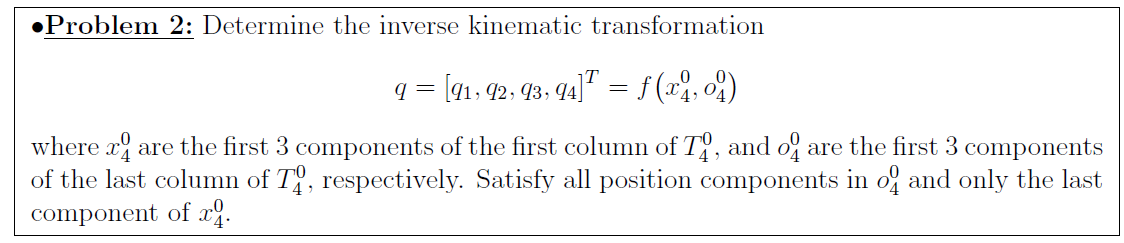

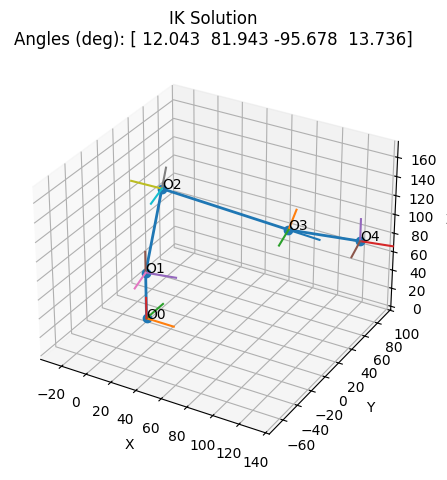

IK solution (rad): [ 0.21018259  1.4301724  -1.66990262  0.23973022]
IK solution (deg): [ 12.04257514  81.94284271 -95.67837236  13.73552965]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15


In [8]:
from RobotFunctions import solve_fk_ik_and_visualize

# [1] Robot geometry (mm)
d1 = 50.0
d2 = 93.0
d3 = 93.0
d4 = 50.0

# [2] Inputs (robot position, and orientation of x-axis of end effector)
pos4 = np.array([150.0, 32.0, 120.0], dtype=float)  # End-effector position (o4^0)
Rot4_X4_Z0 = 0.0                                  # z-component of x4-axis (r31 of R04)

# [3] Solve IK, verify with FK, and visualise
q, T04_fk, T04_target = solve_fk_ik_and_visualize(pos4, Rot4_X4_Z0, d1, d2, d3, d4, draw_axes=True)

# [4] Print results
print("IK solution (rad):", q)
print("IK solution (deg):", np.rad2deg(q))

p_fk = T04_fk[0:3, 3]
print("FK end-effector position (mm):", p_fk)
print("Target position (mm):         ", pos4)
print("Position error norm (mm):     ", np.linalg.norm(p_fk - pos4))

## Problem 3 
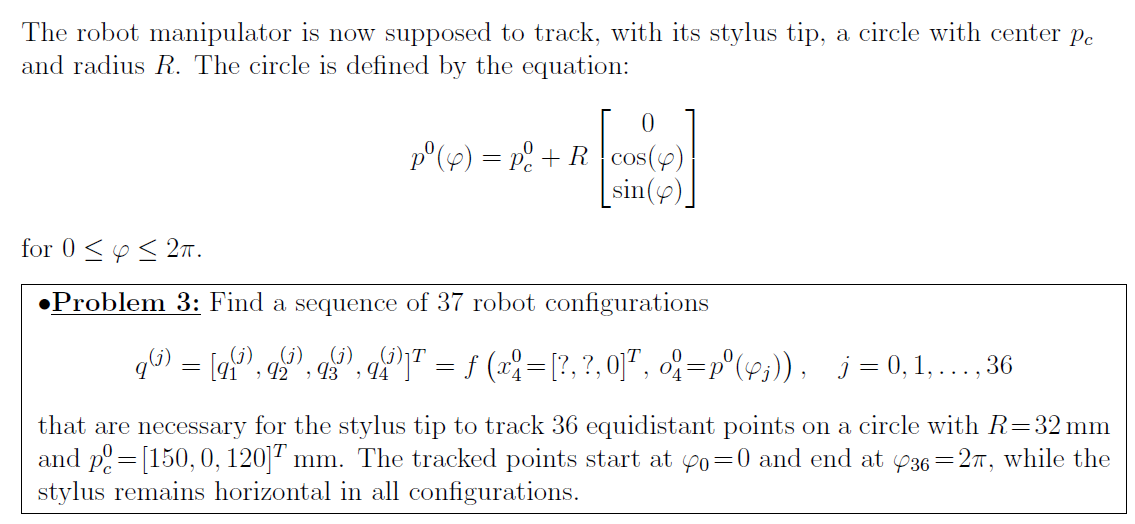

In [9]:
# ---------- Circle specification ----------
phi = np.linspace(0.0, 2*np.pi, 37)                   # 37 points (φ₀ ... φ₃₆)
p_c0 = np.array([150.0, 0.0, 120.0], dtype=float)     # circle centre in {0}
R = 32.0                                              # circle radius (mm)
Rot4_X4_Z0 = 0.0                                      # stylus horizontal (r31 = 0)

# ---------- Storage ----------
Q_rad, Q_deg, P_fk, P_trg, errs = [], [], [], [], []

# ---------- Compute for each waypoint ----------
for th in phi:
    # Circle point: p⁰(φ) = p_c⁰ + R·[0, cosφ, sinφ]^T
    p_target = p_c0 + R * np.array([0.0, np.cos(th), np.sin(th)], dtype=float)

    # Build full pose and solve IK
    T_target = RF.build_pose_from_inputs(p_target, Rot4_X4_Z0)
    q = RF.inverse_ik_from_pose(T_target, d1, d2, d3, d4)

    # Forward check
    T_fk = RF.fk_T04(q, d1, d2, d3, d4)
    p_fk = T_fk[:3, 3]
    err = np.linalg.norm(p_fk - p_target)

    # Store
    Q_rad.append(q)
    Q_deg.append(np.rad2deg(q))
    P_fk.append(p_fk)
    P_trg.append(p_target)
    errs.append(err)

Q_rad, Q_deg, P_fk, P_trg, errs = (
    np.vstack(Q_rad),
    np.vstack(Q_deg),
    np.vstack(P_fk),
    np.vstack(P_trg),
    np.array(errs),
)

# ---------- Print verification for first waypoint ----------
print("IK solution (rad):", Q_rad[0])
print("IK solution (deg):", Q_deg[0])
print("FK end-effector position (mm):", P_fk[0])
print("Target position (mm):         ", P_trg[0])
print("Position error norm (mm):     ", errs[0])

print("\nGlobal checks over 37 points:")
print(f"Max |position error| (mm): {errs.max():.3e}")
print(f"Mean |position error| (mm): {errs.mean():.3e}")

IK solution (rad): [ 0.21018259  1.4301724  -1.66990262  0.23973022]
IK solution (deg): [ 12.04257514  81.94284271 -95.67837236  13.73552965]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15

Global checks over 37 points:
Max |position error| (mm): 5.955e-14
Mean |position error| (mm): 2.327e-14


In [10]:
# ---------- Print all joint configurations ----------
print("\nAll 37 joint configurations (degrees):\n")

for j in range(len(phi)):
    print(f"phi_{j:<2d} = {np.round(Q_deg[j], 8)}")


All 37 joint configurations (degrees):

phi_0  = [ 12.04257514  81.94284271 -95.67837236  13.73552965]
phi_1  = [ 11.86484519  82.71977199 -93.06041825  10.34064627]
phi_2  = [ 11.33569998  83.39915099 -90.46433962   7.06518863]
phi_3  = [ 10.46748318  83.97285639 -87.9719723    3.99911591]
phi_4  = [  9.28139181  84.43962928 -85.66770094   1.22807167]
phi_5  = [  7.80815824  84.80356906 -83.63561029  -1.16795878]
phi_6  = [  6.08852815  85.07235112 -81.95555974  -3.11679138]
phi_7  = [  4.17315111  85.25520566 -80.69823913  -4.55696653]
phi_8  = [  2.12154884  85.3607923  -79.91966045  -5.44113184]
phi_9  = [  0.          85.39524898 -79.65596513  -5.73928384]
phi_10 = [ -2.12154884  85.3607923  -79.91966045  -5.44113184]
phi_11 = [ -4.17315111  85.25520566 -80.69823913  -4.55696653]
phi_12 = [ -6.08852815  85.07235112 -81.95555974  -3.11679138]
phi_13 = [ -7.80815824  84.80356906 -83.63561029  -1.16795878]
phi_14 = [ -9.28139181  84.43962928 -85.66770094   1.22807167]
phi_15 = [-10.

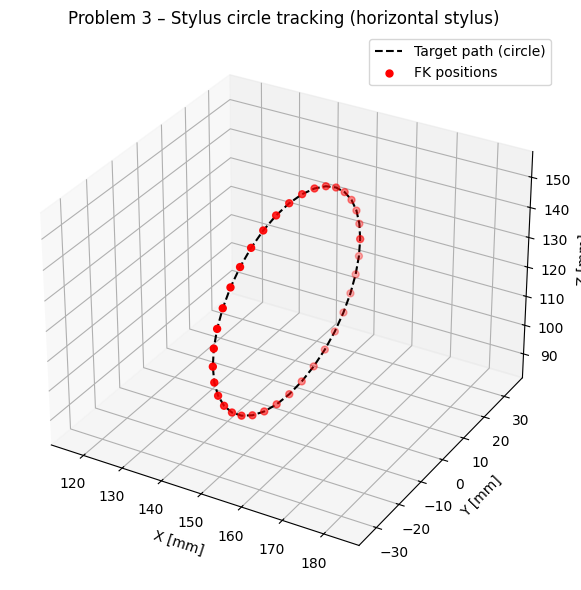


Visualizing waypoint j=0 (φ=0.00π)


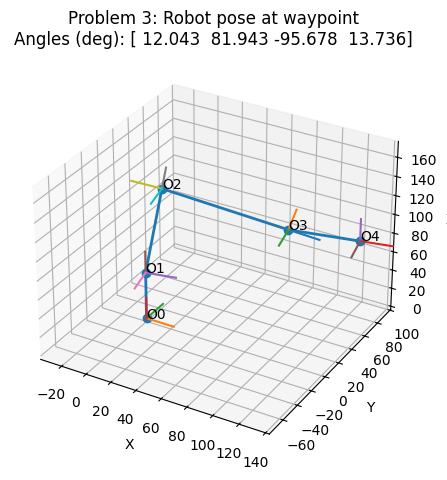

In [11]:
# ---------- Plot all 37 positions ----------
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

# Plot circle path
ax.plot(P_trg[:,0], P_trg[:,1], P_trg[:,2], 'k--', label="Target path (circle)")
# Plot FK-computed points
ax.scatter(P_fk[:,0], P_fk[:,1], P_fk[:,2], c='r', s=25, label="FK positions")

# Equal aspect
x, y, z = P_trg[:,0], P_trg[:,1], P_trg[:,2]
max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min())
mid = [x.mean(), y.mean(), z.mean()]
for axis, m in zip([ax.set_xlim, ax.set_ylim, ax.set_zlim], mid):
    axis(m - 0.6*max_range, m + 0.6*max_range)

ax.set_xlabel("X [mm]")
ax.set_ylabel("Y [mm]")
ax.set_zlabel("Z [mm]")
ax.set_title("Problem 3 – Stylus circle tracking (horizontal stylus)")
ax.legend()
plt.tight_layout()
plt.show()

# visualize any single configuration
j = 0   # choose any index 0–36
from math import pi
DH_table = np.array([
    [0.0,  d1, 0.0,  np.pi/2],
    [0.0, 0.0,  d2,  0.0],
    [0.0, 0.0,  d3,  0.0],
    [0.0, 0.0,  d4,  0.0],
])
print(f"\nVisualizing waypoint j={j} (φ={phi[j]/pi:.2f}π)")
RF.plot_robot_4link(Q_rad[j], DH_table, title="Problem 3: Robot pose at waypoint")


# Problem 4

Determine the Jacobian of the manipulator for the robot end-effector and the Jacobian for the robot camera (as a function of the joint configuration q). Report the numerical results for the two Jacobians at $\varphi = 0$, $\varphi = \pi/2$, $\varphi = \pi$, and $\varphi = 3\pi/2$ along the path studies in Problem 3.

In [12]:
picks      = [0, 9, 18, 27, 36]          # indices along the 37-point path
phi_labels = [0, sp.pi/2, sp.pi, 3*sp.pi/2, 2*sp.pi]

for phi_lbl, idx in zip(phi_labels, picks):
    q_here = tuple(Q_rad[idx, :].tolist())
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

    print(f"φ = {phi_lbl}   (row {idx})")
    print("J_end-effector (6×4):")
    sp.pretty_print(J4)
    print("\nJ_camera (6×4):")
    sp.pretty_print(J5)
    print("\n" + "-"*60 + "\n")

φ = 0   (row 0)
J_end-effector (6×4):
⎡-32.0  -68.4595    21.596        0    ⎤
⎢                                      ⎥
⎢150.0  -14.6047    4.60715       0    ⎥
⎢                                      ⎥
⎢  0     153.375    140.34      50.0   ⎥
⎢                                      ⎥
⎢  0    0.208638   0.208638   0.208638 ⎥
⎢                                      ⎥
⎢  0    -0.977993  -0.977993  -0.977993⎥
⎢                                      ⎥
⎣ 1.0       0          0          0    ⎦

J_camera (6×4):
⎡-31.9969  -68.5035    21.552    -0.0440097 ⎤
⎢                                           ⎥
⎢149.985   -14.6141    4.59776   -0.00938873⎥
⎢                                           ⎥
⎢   0       153.36     140.325     49.985   ⎥
⎢                                           ⎥
⎢   0      0.208638   0.208638    0.208638  ⎥
⎢                                           ⎥
⎢   0      -0.977993  -0.977993   -0.977993 ⎥
⎢                                           ⎥
⎣  1.0         0          0       

# Problem 5

Compute the joint velocities $\dot{p}$ at $\varphi = \pi/2$, along the path from Problem 3, so that the stylus tip velocity is $v^0_4 = [0, -3, 0]mm/s$ and $\dot{x_4} = [?,?,0]$.

In [13]:
idx = 9                      # φ = π/2 along your 37-point path
q_here = tuple(Q_rad[idx, :].tolist())

J4, _ = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

# Desired end-effector twist v = [vx, vy, vz, wx, wy, wz]^T  (mm/s, rad/s)
v = sp.Matrix([0, -3, 0, 0, 0, 0])

# Minimum-norm solution: dq = J^+ v (right pseudoinverse for 6x4 J)
J4_pinv = J4.pinv()
joint_velocities = J4_pinv * v
# dq = (J4.T*J4).inv() * J4.T * v

# print the pseudoinverse
print("Pseudoinverse")
sp.pretty_print(J4_pinv.applyfunc(lambda x: 0 if abs(sp.N(x)) < 1e-8 else sp.N(x, 6)))
# print the joint velocities
print("\nJoint Velocities")
sp.pretty_print(joint_velocities.applyfunc(lambda x: 0 if abs(sp.N(x)) < 1e-8 else sp.N(x, 6)))

Pseudoinverse
⎡     0        0.00666637       0       0      0       4.44425e-5⎤
⎢                                                                ⎥
⎢ -0.0108753       0       -0.00109386  0  -0.0546657      0     ⎥
⎢                                                                ⎥
⎢ 0.0117507        0        0.0119934   0   0.599548       0     ⎥
⎢                                                                ⎥
⎣-0.000871658      0        -0.01091    0   -1.54512       0     ⎦

Joint Velocities
⎡-0.0199991⎤
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎣    0     ⎦


# Problem 6

In this part, the goal is to plan a trajectory which approximates the circular path from
Problem 3 by means of 5 knot-points at $φ_0, φ_9, φ_{18}, φ_{27}, φ_{36}$.

Use the inverse computed joint configurations $q^{(0)}, q^{(9)}, q^{(18)}, q^{(27)}, q^{(36)}$ from Problem 3, to find suitable interpolation polynomials for the segments.



In [14]:
from tabulate import tabulate

picks = [0, 9, 18, 27, 36]                 # indices along the 37-point path
phi_labels = [0, sp.pi/2, sp.pi, 3*sp.pi/2, 2*sp.pi]

# Store the selected joint configurations
q_selected = [tuple(Q_rad[idx, :].tolist()) for idx in picks]

# Combine with phi values for table display
table_data = []
for phi_lbl, q_vals in zip(phi_labels, q_selected):
    table_data.append([f"{float(phi_lbl):.3f} rad"] + [f"{q:.5f}" for q in q_vals])

# Print as a pretty table
headers = ["φ (rad)", "θ1", "θ2", "θ3", "θ4"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════╤══════════╤═════════╤══════════╤══════════╕
│ φ (rad)   │       θ1 │      θ2 │       θ3 │       θ4 │
╞═══════════╪══════════╪═════════╪══════════╪══════════╡
│ 0.000 rad │  0.21018 │ 1.43017 │ -1.6699  │  0.23973 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 1.571 rad │  0       │ 1.49043 │ -1.39026 │ -0.10017 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 3.142 rad │ -0.21018 │ 1.43017 │ -1.6699  │  0.23973 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 4.712 rad │ -0       │ 1.32116 │ -1.91603 │  0.59487 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 6.283 rad │  0.21018 │ 1.43017 │ -1.6699  │  0.23973 │
╘═══════════╧══════════╧═════════╧══════════╧══════════╛


In [15]:
# End-effector linear velocities (mm/s) at each knot
v_lin_knots = [
    (0.0,   0.0,   0.0),
    (0.0, -27.0,  0.0),
    (0.0,   0.0, -27.0),
    (0.0,  27.0,  0.0),
    (0.0,   0.0,   0.0),
]

# Determine the joint angles at these knots
q_knots = RF.get_q_knots(Q_rad, picks)

# Determine joint velocities at these knots - from EE velocities
qdot_knots = RF.compute_qdot_knots(q_knots, v_lin_knots, d1, d2, d3, d4, T45, lam=None)
RF.print_joint_table(phi_labels, q_knots, qdot_knots)

╒═══════════╤═══════════╤═════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╕
│   φ (rad) │        θ1 │      θ2 │       θ3 │        θ4 │     θ1dot │     θ2dot │     θ3dot │    θ4dot │
╞═══════════╪═══════════╪═════════╪══════════╪═══════════╪═══════════╪═══════════╪═══════════╪══════════╡
│     0     │  0.210183 │ 1.43017 │ -1.6699  │  0.23973  │  0        │  0        │  0        │ 0        │
├───────────┼───────────┼─────────┼──────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│     1.571 │  0        │ 1.49043 │ -1.39026 │ -0.100169 │ -0.179992 │  0        │  0        │ 0        │
├───────────┼───────────┼─────────┼──────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│     3.142 │ -0.210183 │ 1.43017 │ -1.6699  │  0.23973  │  0        │ -0.069265 │ -0.219486 │ 0.288391 │
├───────────┼───────────┼─────────┼──────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│     4.712 │ -0        │ 1.32116 │ -1.91603 │

In [16]:
# Construct joint-space quintic trajectories between the knots
# Each 2-sec segment satisfies the boundary conditions for joint pos, vel, and accel
coeffs = RF.build_segment_coeffs(q_knots, qdot_knots, Tseg=2.0)

# Compute the world path from the interpolated join trajectory
# xyz_actual is the path generated by the interpolated joint trajectory (via FK)
# xyz_desired is the original "ideal circle" from the 37 sampled configurations
ts, xyz_actual, xyz_desired = RF.sample_paths(coeffs, Q_rad, d1, d2, d3, d4, N=400, T_total=8.0)
rmse_mm = RF.compute_rmse(xyz_actual, xyz_desired)

# Compute trajectory accuracy via RMSE
print(f"\nPath RMSE (mm): {rmse_mm:.3f}")


Path RMSE (mm): 4.538


In [17]:
# Build segment matrices (rows = joints 1–4, cols = t^5..t^0)
A = RF.segment_matrix(coeffs['A'])
B = RF.segment_matrix(coeffs['B'])
C = RF.segment_matrix(coeffs['C'])
D = RF.segment_matrix(coeffs['D'])

# Print the matrices of interpolation coefficients
RF.print_matrix_aligned("A_ij coefficients", A)
RF.print_matrix_aligned("B_ij coefficients", B)
RF.print_matrix_aligned("C_ij coefficients", C)
RF.print_matrix_aligned("D_ij coefficients", D)


A_ij coefficients =
┌          │         │         │   │           │       ┐
│ -0.00566 │  0.0396 │ -0.0827 │ 0 │         0 │ 0.210 │
│   0.0113 │ -0.0565 │  0.0753 │ 0 │  1.11e-16 │  1.43 │
│   0.0524 │  -0.262 │   0.350 │ 0 │  6.66e-16 │ -1.67 │
│  -0.0637 │   0.319 │  -0.425 │ 0 │ -8.88e-16 │ 0.240 │
└          │         │         │   │           │       ┘

B_ij coefficients =
┌          │          │          │   │           │          ┐
│ -0.00566 │   0.0171 │  0.00726 │ 0 │    -0.180 │ 1.31e-17 │
│  0.00169 │ -0.00412 │ -0.00605 │ 0 │ -1.04e-17 │     1.49 │
│  -0.0113 │   0.0701 │   -0.130 │ 0 │ -1.11e-16 │    -1.39 │
│  0.00966 │  -0.0663 │    0.136 │ 0 │  1.11e-16 │   -0.100 │
└          │          │          │   │           │          ┘

C_ij coefficients =
┌          │         │         │   │         │        ┐
│  0.00566 │ -0.0396 │  0.0827 │ 0 │       0 │ -0.210 │
│ -0.00745 │  0.0329 │ -0.0324 │ 0 │ -0.0693 │   1.43 │
│ -0.00500 │  0.0113 │  0.0216 │ 0 │  -0.219 │  -1.67 │

# Problem 7

Plot the actual path of the end-effector for the entire period from = 0 to 8 s for the interpolated trajectory from problem 6 and compare it to the exact desired circular path. Try to improve the approximation either by using more knot-points or by using different interpolation functions that those found in Problem 6.

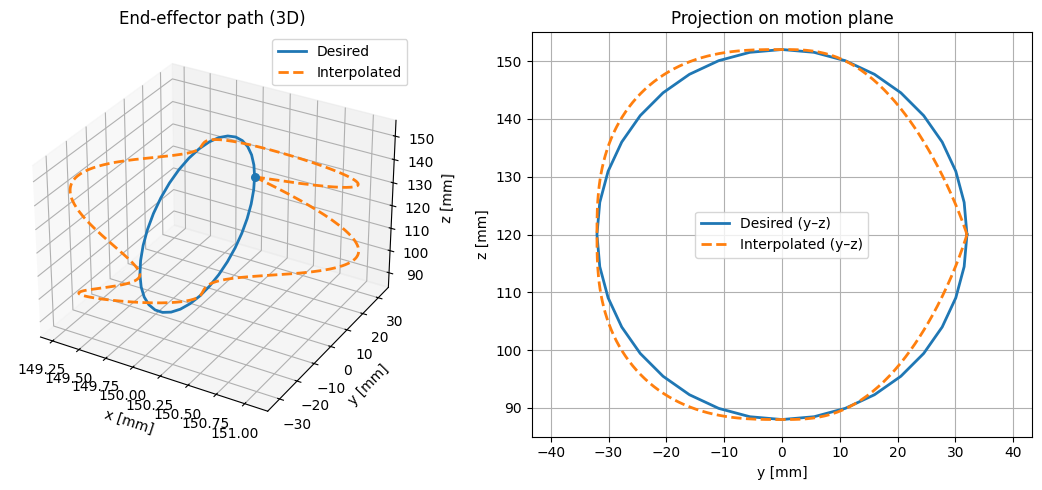

In [18]:
RF.plot_paths(ts, xyz_actual, xyz_desired)


# Problem 8 
Plot the condition number of the Jacobian matrix of the manipulator along
the path from Problem 3 as well as along the actual path from Problem 6 or 7, and evaluate
if the path includes any singularities.


In [19]:
# --------------------------------------------------------------
# Compute the condition number of the Jacobian matrices along circular path in Problem 3
# Large κ ⇒ poor dexterity; κ → ∞ at singularity.
kappa_values = []                                               # κ(J) for each of the 37 circular waypoints

for q_select in Q_rad:
    q_here = tuple(q_select.tolist())                           # joint pose (θ1..θ4) at this waypoint
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)     # Jacobians at EE ({4}) and camera ({5})

    # Convert symbolic matrix -> numeric numpy array
    J4_num = np.array(J4.evalf(3)).astype(np.float64)           # Convert symbolic matrix -> numeric numpy array

    kappa = np.linalg.cond(J4_num)
    kappa_values.append(kappa)

    #print(f"Condition number κ(J) = {kappa:.3e}")

# Interpolated path from quintic (N samples, same time span)
Q_interp = RF.interpolate_joint_trajectory(coeffs, N=400, T_total=8.0) # N samples over 0..8 s

# --------------------------------------------------------------
# Apply the same process for the interpolated path in Problem 6 and 7
kappa_interp = []

for q_select in Q_interp:
    q_here = tuple(q_select.tolist())
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)
    J4_num = np.array(J4.evalf(3)).astype(np.float64)
    kappa = np.linalg.cond(J4_num)
    kappa_interp.append(kappa)


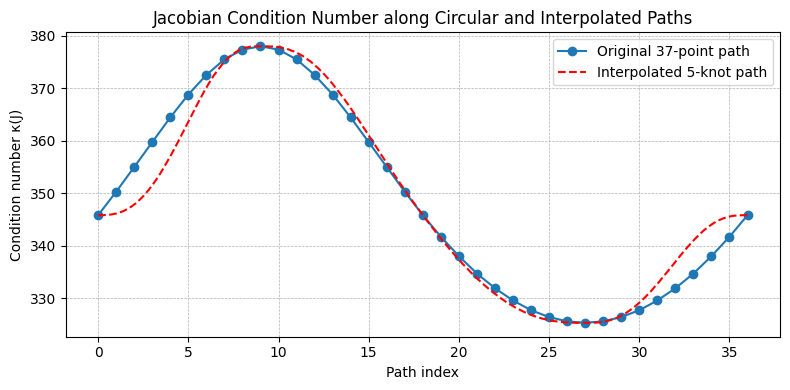

In [20]:

singular_threshold = 1e8
# Plot all kappa values
plt.figure(figsize=(8,4))
# what should we pick for singular threashold?
#plt.axhline(singular_threshold, color='r', linestyle='--', label='Singularity threshold')
plt.plot(range(len(Q_rad)), kappa_values, 'o-', label='Original 37-point path')
plt.plot(np.linspace(0, len(Q_rad)-1, len(kappa_interp)), kappa_interp, 'r--', label='Interpolated 5-knot path')
#plt.yscale('log')
plt.xlabel('Path index')
plt.ylabel('Condition number κ(J)')
plt.title('Jacobian Condition Number along Circular and Interpolated Paths')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


A singularity happens when the Jacobian loses rank, meaning the robot can no longer move in some direction and the condition number becomes extremely large.
In the plot above, the condition number stays around 330–380 with no sharp spikes, showing that the Jacobian remains well-conditioned and full rank.
This means the robot’s links never align in a way that reduces its mobility—so neither path crosses a singularity.

# Problem 9 
Neglecting the own mass of the robot arm, and assuming a weight of 1N
acting on the end-effector along the negative z0 direction, calculate and plot all joint torques
τ1, τ2, τ3, τ4 as a function of the position φ ∈ [0, 2π]. Hint: Neglect friction and other losses.

In [21]:
t14 = []
t24 = []
t34 = []
t44 = []
t_total = []

F = sp.Matrix([0, 0, -1, 0, 0, 0])  # Define force applied on the segments

# Calculate torques, Joint torques/forces vector 𝜏 can be found as tao = J^t * F
# where F is a 6-component vector with forces/torques applied to the end-effector
# τ(q) = J4(q)^T * F, where F = [Fx, Fy, Fz, Mx, My, Mz] in the base frame.

for q_select in Q_rad:
    J_4, J_5 = RF.jacobian(q_select, (d1, d2, d3, d4), T45=T45) 
    t_total = (J_4.T@F)
    t14.append(t_total[0])  # scalar
    t24.append(t_total[1])
    t34.append(t_total[2])
    t44.append(t_total[3])

# Stack into a 37×4 matrix; column i is τ_i(φ) across the path
t3 = sp.Matrix([t14, t24, t34, t44]).T


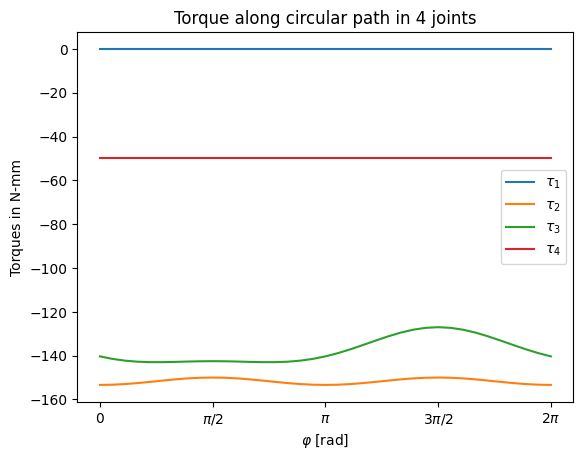

In [22]:
plt.figure()
plt.title('Torque along circular path in 4 joints')
plt.plot(phi, t3[:,0], label=r'$\tau_1$')
plt.plot(phi, t3[:,1], label=r'$\tau_2$')
plt.plot(phi, t3[:,2], label=r'$\tau_3$')
plt.plot(phi, t3[:,3], label=r'$\tau_4$')
xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
xtick_labels = ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
plt.xticks(xticks, xtick_labels)
plt.ylabel('Torques in N-mm')
plt.xlabel(r'$\varphi$ [rad]')  # X-axis label in radians
plt.legend()
plt.show()

# Problem 10


Provide a rough but realistic estimate for *I₀* based on the dimensions and mass (e.g. of link 1), and use the estimated value for the remaining links.  
Then derive the dynamic system for the robot arm in its standard form:

$$
D(q)\,\ddot{q} + C\big(q,\dot{q}\big)\,\dot{q} + g(q) = \tau
$$


and plot the required joint torques **τ** for the trajectory from **Problem 6** or **Problem 7**.

In [ ]:
# Masses (kg)
m1, m2, m3, m4 = 0.060, 0.080, 0.080, 0.040
masses = [m1, m2, m3, m4]

# Gravity (mm/s^2) so torques are N·mm
g_vec = np.array([0.0, 0.0, -9.81e3])  # base/world frame

# COM offsets in each link's local frame {1}..{4} (mm)
def com_offsets_local(d1, d2, d3, d4):
    r_c1_1 = np.array([0.0,  0.0, +20.0])         # CM1 at +20 mm on z1
    r_c2_2 = np.array([d2/2.0, 0.0,   0.0])       # CM2 mid-link on x2
    r_c3_3 = np.array([d3/2.0, 0.0,   0.0])       # CM3 mid-link on x3
    r_c4_4 = np.array([-25.0,  +15.0, 0.0])       # CM4: -25 mm x4, +15 mm y4
    return [r_c1_1, r_c2_2, r_c3_3, r_c4_4]

# -------------------------------
# 1) Estimate I0 from link 1 shape
# -------------------------------
# Choose rough box dimensions (mm) for each link
a1, b1, c1 = 50.0, 20.0, 30.0  # along local x1,y1,z1 respectively
a2, b2, c2 = 120.0, 20, 30
a3, b3, c3 = a2, b2, c2
a4, b4, c4 = 55, 20, 30

def box_inertia_about_cm(m, a, b, c):
    """Return diag(Ixx,Iyy,Izz) for box (mm units -> N·mm·s^2 when multiplied by kg)."""
    Ixx = (m/12.0)*(b**2 + c**2)
    Iyy = (m/12.0)*(a**2 + c**2)
    Izz = (m/12.0)*(a**2 + b**2)
    return np.array([Ixx, Iyy, Izz], dtype=float)

We compute $I0$, the base moment of inertia constant.

It is calculated by taking the least-squares best estimate of $I0$ that makes the theoretical link inertia patterns match the actual geometric inertias.

In [42]:
# --- Box inertias for all links (diag) using your a,b,c and masses ---
I_box1 = box_inertia_about_cm(m1, a1, b1, c1)
I_box2 = box_inertia_about_cm(m2, a2, b2, c2)
I_box3 = box_inertia_about_cm(m3, a3, b3, c3)

# Patterns from the handout
pat1 = np.array([1.0, 0.4, 0.9])
pat2 = np.array([0.45, 1.4, 1.2])

# Solve min ||A*I0 - b||_2 over all components of all links
b = np.hstack([I_box1, I_box2])           # shape (12,)
A = np.hstack([pat1,   pat2]).reshape(-1,1)  # shape (12,1)
I0_ls, *_ = np.linalg.lstsq(A, b, rcond=None)
I0 = float(I0_ls)

print("Estimated I0 (in kg·mm^2):", I0)
print("Estimated I0 (in kg·m^2):", I0/1000**2)

Estimated I0 (in kg·mm^2): 52.30148048452222
Estimated I0 (in kg·m^2): 5.2301480484522225e-05


C:\Users\justi\AppData\Local\Temp\ipykernel_9744\1658326189.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  I0 = float(I0_ls)


This value of I0 is then used as a reference to scale all the link inertia tensors.

In [43]:
# Build inertia tensors in each link's CM frame using the given scalings
I1_bar = np.diag([1.0*I0, 0.4*I0, 0.9*I0])
I23_bar = np.diag([0.45*I0, 1.4*I0, 1.2*I0])
I4_bar  = np.diag([0.5*I0,  0.5*I0,  0.5*I0])
I_local_list = [I1_bar, I23_bar, I23_bar, I4_bar]  # 3x3 each

print(f"I1_bar: \n{I1_bar}")
print("\n")
print(f"I23_bar: \n{I23_bar}")
print("\n")
print(f"I4_bar: \n{I4_bar}")

I1_bar: 
[[52.30148048  0.          0.        ]
 [ 0.         20.92059219  0.        ]
 [ 0.          0.         47.07133244]]


I23_bar: 
[[23.53566622  0.          0.        ]
 [ 0.         73.22207268  0.        ]
 [ 0.          0.         62.76177658]]


I4_bar: 
[[26.15074024  0.          0.        ]
 [ 0.         26.15074024  0.        ]
 [ 0.          0.         26.15074024]]


Defining some helper functions for computing the Centre Of Mass (COM) Jacobians

In [44]:
# 2) Kinematics helpers for COMs and axes

def forward_transforms(q, d1, d2, d3, d4):
    """Return list of T0i for i=0..4 using your DH convention."""
    t1,t2,t3,t4 = q
    T01 = RF.dh_std_np(t1, d1, 0.0, np.pi/2)
    T12 = RF.dh_std_np(t2, 0.0, d2, 0.0)
    T23 = RF.dh_std_np(t3, 0.0, d3, 0.0)
    T34 = RF.dh_std_np(t4, 0.0, d4, 0.0)
    T02 = T01 @ T12
    T03 = T02 @ T23
    T04 = T03 @ T34
    return [np.eye(4), T01, T02, T03, T04]

def world_point(T, p_local):
    """Transform 3D point in local frame to world frame."""
    p = np.ones(4); p[:3] = p_local
    return (T @ p)[:3]

def z_axis(T):
    """World z-axis of this transform (3,)"""
    return T[:3, 2]

# moves each link’s COM offset (given in its own local frame) into the world frame; and
# returns rotations R0i that you need to rotate inertia tensors into world.
def com_world_positions(q, d1, d2, d3, d4):
    """Return r_ci in world frame for i=1..4 and also R0i rotations."""
    Ts = forward_transforms(q, d1, d2, d3, d4)
    R0i = [T[:3,:3] for T in Ts[1:5]]
    rc_local = com_offsets_local(d1, d2, d3, d4)
    rc_world = [world_point(Ts[i], rc_local[i-1]) for i in range(1,5)]
    return rc_world, R0i, Ts

def com_jacobians(q, d1, d2, d3, d4):
    """
    Build Jv_c[i], Jw[i] for link i=1..4 (each 3x4), using standard revolute formulas
    with columns zeroed for joints beyond the link index.
    """
    rc, R0i, Ts = com_world_positions(q, d1, d2, d3, d4)
    O = [Ts[i][:3,3] for i in range(5)]
    z = [np.array([0,0,1.0]), z_axis(Ts[1]), z_axis(Ts[2]), z_axis(Ts[3])]  # z0..z3

    Jv_list, Jw_list = [], []
    for i_link in range(1,5):
        rci = rc[i_link-1]
        Jv = np.zeros((3,4)); Jw = np.zeros((3,4))
        for j in range(1,5):
            if j <= i_link:  # only joints up to the current link affect its COM
                zj_1 = z[j-1]
                oj_1 = O[j-1]
                Jv[:, j-1] = np.cross(zj_1, (rci - oj_1))
                Jw[:, j-1] = zj_1
        Jv_list.append(Jv)
        Jw_list.append(Jw)
    return Jv_list, Jw_list, rc, R0i



Defining some helper functions to compute the inertia matrix $D(q)$ and Christoffel symbols $[C_{q,\dot{q}}]_{kj}$

In [45]:
# -----------------------------------------
# 3) Dynamics: D(q), C(q,qdot)qdot, and g(q)
# -----------------------------------------

# For each link, we accumulate m JvᵀJv + Jwᵀ I_world Jw, where I_world = R I_local Rᵀ.
# Sum over all links gives the total 4×4 inertia matrix.
def inertia_matrix_D(q, d1, d2, d3, d4):
    Jv_list, Jw_list, rc, R0i = com_jacobians(q, d1, d2, d3, d4)
    D = np.zeros((4,4))
    for i in range(4):
        m = masses[i]
        Jv = Jv_list[i]
        Jw = Jw_list[i]
        R = R0i[i]
        Iw = R @ I_local_list[i] @ R.T
        D += m * (Jv.T @ Jv) + (Jw.T @ Iw @ Jw)
    return D

def numeric_partial_D(q, d1,d2,d3,d4, idx, h=1e-6):
    """∂D/∂q_idx via central difference."""
    q1 = np.array(q, dtype=float); q2 = np.array(q, dtype=float)
    q1[idx] -= h; q2[idx] += h
    D1 = inertia_matrix_D(q1, d1,d2,d3,d4)
    D2 = inertia_matrix_D(q2, d1,d2,d3,d4)
    return (D2 - D1) / (2*h)

def coriolis_times_qdot(q, qdot, d1,d2,d3,d4):
    """
    Compute C(q, qdot) qdot without forming C explicitly:
      [C qdot]_k = 0.5 * Σ_i Σ_j (∂d_kj/∂q_i + ∂d_ki/∂q_j - ∂d_ij/∂q_k) q̇_i q̇_j
    """    
    Dq = [numeric_partial_D(q, d1,d2,d3,d4, k) for k in range(4)]
    cq = np.zeros(4)
    for k in range(4):
        for i in range(4):
            for j in range(4):
                term = 0.5*( Dq[i][k,j] + Dq[j][k,i] - Dq[k][i,j] ) * qdot[i] * qdot[j]
                cq[k] += term
    return cq

def gravity_vector(q, d1, d2, d3, d4):
    """g(q) = ∂/∂q of potential energy (using finite diff)."""
    def potential(qv):
        rc, _, _Ts = com_world_positions(qv, d1,d2,d3,d4)
        P = 0.0
        for i in range(4):
            P += -masses[i] * (g_vec @ rc[i])   # minus because we use base z-up convention
        return P
    g = np.zeros(4)
    h = 1e-6
    for k in range(4):
        q1 = np.array(q); q2 = np.array(q)
        q1[k] -= h; q2[k] += h
        g[k] = (potential(q2) - potential(q1)) / (2*h)
    return g

def coriolis_matrix(q, qdot, d1, d2, d3, d4):
    """
    Build the 4x4 matrix C(q, qdot) so that C @ qdot == coriolis_times_qdot(...).
    Uses Christoffel symbols from numeric partials of D.
    """
    Dq = [numeric_partial_D(q, d1, d2, d3, d4, k) for k in range(4)]
    C = np.zeros((4,4))
    for k in range(4):
        for j in range(4):
            s = 0.0
            for i in range(4):
                c_ijk = 0.5 * (Dq[i][k, j] + Dq[j][k, i] - Dq[k][i, j])
                s += c_ijk * qdot[i]
            C[k, j] = s
    return C

def pretty(name, M, fmt="{:10.3f}"):
    """Nicely format numpy arrays/matrices."""
    M = np.asarray(M, dtype=float)
    print(f"\n{name} =")
    for r in M:
        print(" ".join(fmt.format(x) for x in r))

# Helpers to evaluate quintic derivatives using your coeffs structure
def eval_quintic_derivatives(a, t):
    """
    Given coefficients [a0..a5] for q(t), return (q, qd, qdd) at scalar t.
    """
    a0,a1,a2,a3,a4,a5 = a
    q   = ((a5*t + a4)*t + a3)*t**3 + a2*t*t + a1*t + a0
    qd  = (5*a5*t + 4*a4)*t*t + 3*a3*t*t + 2*a2*t + a1
    qdd = 20*a5*t*t + 12*a4*t + 6*a3*t + 2*a2
    return q, qd, qdd

def q_qd_qdd_at_time(coeffs, t):
    """
    Piecewise-segment evaluation on [0,8] with segments A,B,C,D of length 2s.
    Returns 4-vectors q, qd, qdd.
    """
    if   0.0 <= t < 2.0: seg, tau = "A", t - 0.0
    elif 2.0 <= t < 4.0: seg, tau = "B", t - 2.0
    elif 4.0 <= t < 6.0: seg, tau = "C", t - 4.0
    elif 6.0 <= t <= 8.0: seg, tau = "D", t - 6.0
    else: raise ValueError("t out of [0,8]")
    q   = np.zeros(4); qd  = np.zeros(4); qdd = np.zeros(4)
    for j in range(4):
        q[j], qd[j], qdd[j] = eval_quintic_derivatives(coeffs[seg][j], tau)
    return q, qd, qdd

Continuing with the dynamic analysis of the robot, the following terms of the inertia matrix $D(q)$ and Christoffel symbols $[C_{q,\dot{q}}]_{kj}$ are computed:

$$
D(q) = \sum_{i=1}^{4} m_i J_{v,CM_i}^T J_{v,CM_i}
      + J_{\omega_i}^T \left( R_i I_i R_i^T J_{\omega_i} \right)
$$

and

$$
[C_{q,\dot{q}}]_{kj}
= \frac{1}{2} \sum_{i=1}^{4} 
  \left(
    \frac{\partial d_{kj}}{\partial q_i} +
    \frac{\partial d_{ki}}{\partial q_j} -
    \frac{\partial d_{ij}}{\partial q_k}
  \right) \dot{q}_i
$$

With the inertia matrix and Christoffel symbols calculated, we can then construct the dynamic model of the robot system, which can be used calculate the torque at any point in time/any joint configuration.

$$
D(q)\,\ddot{q} \;+\; C(q,\dot{q})\,\dot{q} \;+\; g(q) \;=\; \tau
$$

In [46]:
# 4) Evaluate along your interpolated trajectory and plot

# Time samples
T_total = 8.0
N = 300
ts = np.linspace(0.0, T_total, N)
taus = np.zeros((N,4))

qdot_hist = np.zeros((N, 4))
qdd_hist  = np.zeros((N, 4))
q_hist    = np.zeros((N, 4))

for idx, t in enumerate(ts):
    # Evaluate
    q, qd, qdd = q_qd_qdd_at_time(coeffs, t)
    D = inertia_matrix_D(q, d1,d2,d3,d4)
    Cqd = coriolis_times_qdot(q, qd, d1,d2,d3,d4)
    gq = gravity_vector(q, d1,d2,d3,d4)
    tau = D @ qdd + Cqd + gq

    # Save the values into the arrays - for plotting torque vs joint velocity
    # remove if not plotting this
    taus[idx,:] = tau
    qdot_hist[idx]  = qd
    qdd_hist[idx]   = qdd
    q_hist[idx]     = q

We can view, at a specific point in time, the: 
- Gravitational terms, expressed by $g(q)$
- Inertia matrix, $D(q)$
- Christoffel symbols, $[C_{q,\dot{q}}]_{kj}$

In [47]:
# --- Pick a time to inspect (e.g., mid-trajectory) ---
t_sample = 2.0  # seconds; change as needed

# Get state from your quintic trajectory (no RF.interpolate_joint_trajectory used)
q, qdot, qddot = q_qd_qdd_at_time(coeffs, t_sample)

# Compute dynamics terms
D = inertia_matrix_D(q, d1, d2, d3, d4)
C = coriolis_matrix(q, qdot, d1, d2, d3, d4)
g = gravity_vector(q, d1, d2, d3, d4)

# Option B: use your RF.print_matrix_aligned (convert to SymPy)
RF.print_matrix_aligned("D(q) [kg·mm^2]", sp.Matrix(D), digits=4)
RF.print_matrix_aligned("C(q,qdot)",      sp.Matrix(C), digits=4)
RF.print_matrix_aligned("g(q) [row]",     sp.Matrix(g.reshape(1, -1)), digits=4)

# Sanity: full torque at this instant (optional)
tau_here = D @ qddot + C @ qdot + g
print("\nτ(t={:.3f}s) [N·mm] = {}".format(t_sample, np.round(tau_here, 3)))


D(q) [kg·mm^2] =
┌           │           │           │           ┐
│     2514. │ 3.369e-13 │ 1.551e-13 │ 1.355e-14 │
│ 3.369e-13 │     5503. │     2534. │     221.4 │
│ 1.551e-13 │     2534. │     2222. │     158.3 │
│ 1.355e-14 │     221.4 │     158.3 │     60.15 │
└           │           │           │           ┘

C(q,qdot) =
┌           │            │            │            ┐
│ 4.430e-14 │      353.9 │      52.14 │      13.50 │
│    -353.9 │ -1.563e-13 │ -1.873e-13 │ -9.001e-16 │
│    -52.14 │  2.593e-14 │ -5.131e-15 │  9.905e-16 │
│    -13.50 │ -4.231e-15 │ -6.122e-15 │  8.628e-25 │
└           │            │            │            ┘

g(q) [row] =
┌   │           │           │        ┐
│ 0 │ -1.726e+5 │ -1.551e+5 │ -9810. │
└   │           │           │        ┘

τ(t=2.000s) [N·mm] = [     -0.    -172565.756 -155041.688   -9807.57 ]


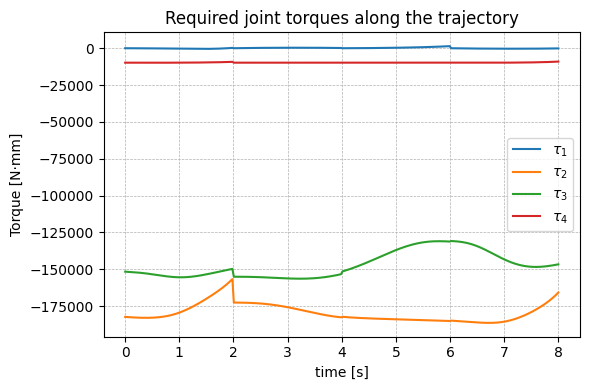

In [48]:

# ---------------- Plot torques over time ----------------
plt.figure(figsize=(6,4))
for j in range(4):
    plt.plot(ts, taus[:,j], label=fr'$\tau_{j+1}$')
plt.xlabel('time [s]')
plt.ylabel('Torque [N·mm]')
plt.title('Required joint torques along the trajectory')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Plot torque vs joint velocity

x-axis = joint speed (rad/s), y-axis = torque (N·m), traced over time.

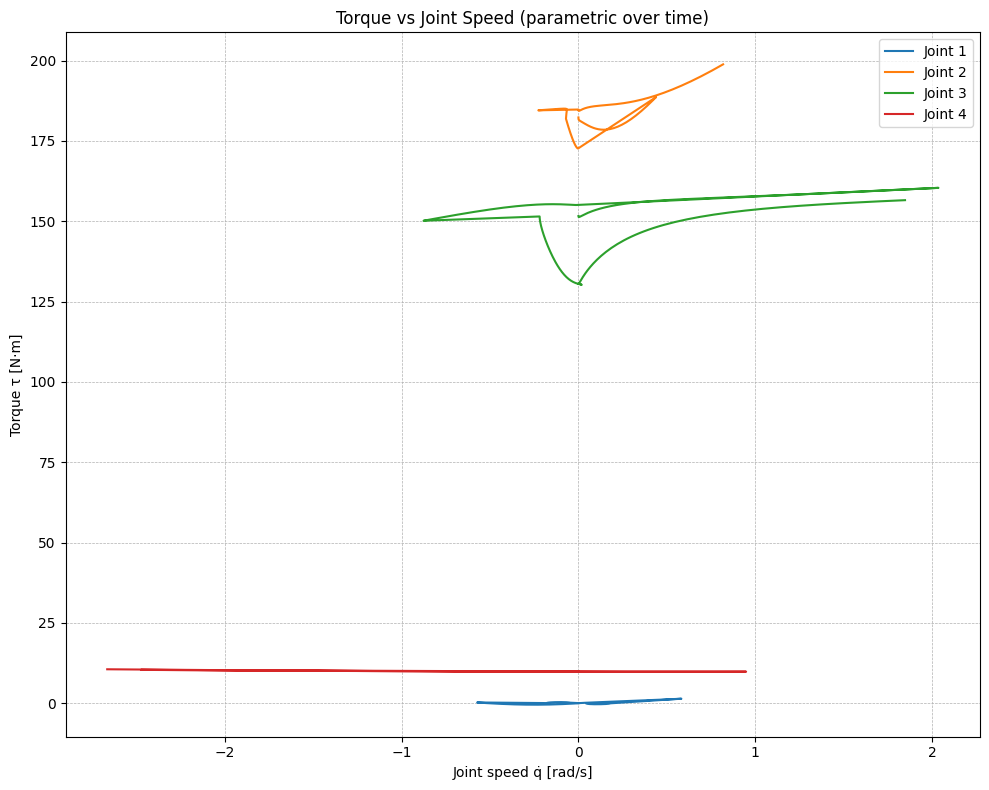

In [34]:
# Convert torque to N·m, keep q̇ in rad/s
tau_Nm = taus / 1000.0

# 1) Line (parametric) plots: τ_j vs q̇_j over time
plt.figure(figsize=(10,8))
for j in range(4):
    plt.plot(qdot_hist[:, j], tau_Nm[:, j], label=fr'Joint {j+1}')
plt.xlabel('Joint speed q̇ [rad/s]')
plt.ylabel('Torque τ [N·m]')
plt.title('Torque vs Joint Speed (parametric over time)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()